In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np
from math import *

In [2]:
def func1(x):
    return 1/(1 + x*x)


In [3]:
def func2(x):
    return x**(1/3.0)*exp(sin(x))

In [4]:
def int_trapezoidal(f, a, b, n):
    h = (b - a) / n
    s = (f(a) + f(b)) / 2
    for i in range(1, n):
        s += f(a + h * i)
    return s * h

In [5]:
def int_simpson(f, a, b, n):
    if n % 2 == 1:
        n += 1

    h = (b - a) / n
    s = f(a) + f(b)
    n2 = int(n/2)
    for i in range(1, n2):
        s += 2 * f(a + h * 2 * i)
    for i in range(1, n2 + 1):
        s += 4 * f(a + h * (2 * i - 1))
    return s * h / 3


In [6]:
def main(func, r_a, r_b, N):
    xs = np.linspace(r_a, r_b, 1000)
    ys = np.vectorize(func)(xs)
    plt.plot(xs, ys)
    plt.show()

    integral = quad(func, r_a, r_b)
    print(integral)
    integral = integral[0]


    ns = []
    t_points = []
    s_points = []

    print('/------+-----------+-----------+-----------+-----------\\')
    print('|   N  | trapezoid |   error   |  simpson  |   error   |')
    print('+------+-----------+-----------+-----------+-----------+')
    for i in range(N):
        n = 2 ** i
        ns.append(n)
        int_t = int_trapezoidal(func, r_a, r_b, n)
        err_t = abs(int_t - integral)
        t_points.append(err_t)
        int_s = int_simpson(func, r_a, r_b, n)
        err_s = abs(int_s - integral)
        s_points.append(err_s)
        print(f'| {n:>4} | {int_t:>9.6g} | {err_t:>9.3e} | {int_s:>9.6g} | {err_s:>9.3e} |')
    print('\\------+-----------+-----------+-----------+-----------/')

    plt.plot(ns, t_points, label='trapezoidal')
    plt.plot(ns, s_points, label='simpson')
    plt.legend()
    plt.xscale("log")
    plt.yscale("log")
    plt.show()
    

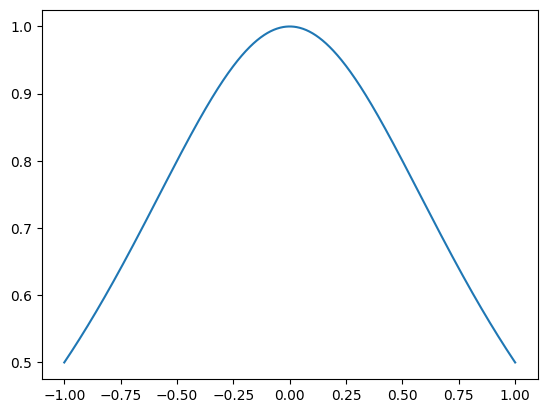

(1.5707963267948968, 1.7439342485646153e-14)
/------+-----------+-----------+-----------+-----------\
|   N  | trapezoid |   error   |  simpson  |   error   |
+------+-----------+-----------+-----------+-----------+
|    1 |         1 | 5.708e-01 |   1.66667 | 9.587e-02 |
|    2 |       1.5 | 7.080e-02 |   1.66667 | 9.587e-02 |
|    4 |      1.55 | 2.080e-02 |   1.56667 | 4.130e-03 |
|    8 |   1.56559 | 5.208e-03 |   1.57078 | 1.201e-05 |
|   16 |   1.56949 | 1.302e-03 |    1.5708 | 7.557e-08 |
|   32 |   1.57047 | 3.255e-04 |    1.5708 | 1.182e-09 |
|   64 |   1.57071 | 8.138e-05 |    1.5708 | 1.848e-11 |
|  128 |   1.57078 | 2.035e-05 |    1.5708 | 2.891e-13 |
|  256 |   1.57079 | 5.086e-06 |    1.5708 | 4.885e-15 |
|  512 |    1.5708 | 1.272e-06 |    1.5708 | 0.000e+00 |
\------+-----------+-----------+-----------+-----------/


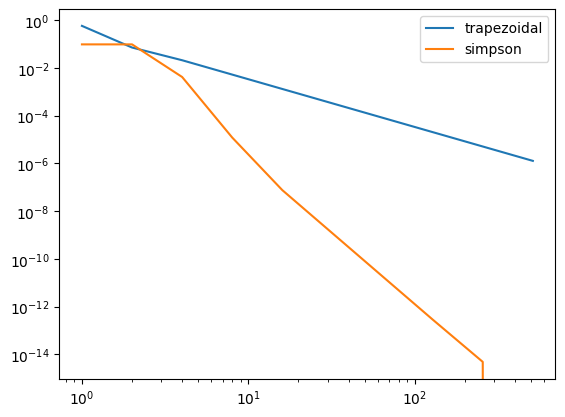

In [7]:
if __name__ == '__main__':

    main(func1, -1, 1, 10)

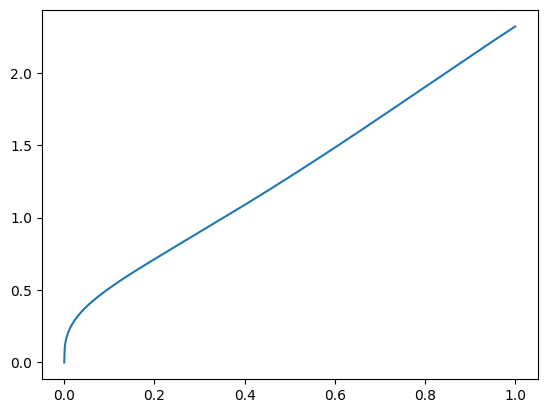

(1.2958740087317049, 1.1273599831440606e-09)
/------+-----------+-----------+-----------+-----------\
|   N  | trapezoid |   error   |  simpson  |   error   |
+------+-----------+-----------+-----------+-----------+
|    1 |   1.15989 | 1.360e-01 |   1.24126 | 5.462e-02 |
|    2 |   1.22092 | 7.496e-02 |   1.24126 | 5.462e-02 |
|    4 |   1.26124 | 3.464e-02 |   1.27468 | 2.120e-02 |
\------+-----------+-----------+-----------+-----------/


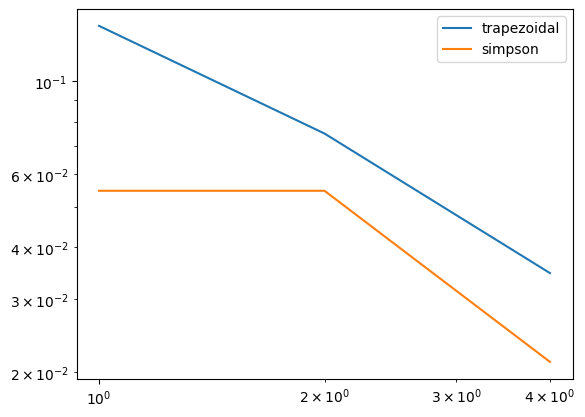

In [10]:
main(func2, 0, 1, 3)